In [1]:
# Estimate CTSM-CAMELS time cost according to DDS runs

In [51]:
import numpy as np
import os, sys, glob, time, re
import netCDF4 as nc
from datetime import datetime
import matplotlib.pyplot as plt

def calculate_creation_time_difference(file_path_1, file_path_2):
    def parse_creation_timestamp(history_str):
        timestamp_str = re.search(r'created on (\d{2}/\d{2}/\d{2} \d{2}:\d{2}:\d{2})', history_str)
        if timestamp_str:
            timestamp_str = timestamp_str.group(1)
            timestamp = datetime.strptime(timestamp_str, '%m/%d/%y %H:%M:%S')
            return timestamp
        else:
            return None

    try:
        with nc.Dataset(file_path_1, 'r') as ncfile1, nc.Dataset(file_path_2, 'r') as ncfile2:
            history_attr_1 = ncfile1.getncattr('history')
            history_attr_2 = ncfile2.getncattr('history')
            
            creation_time_1 = parse_creation_timestamp(history_attr_1)
            creation_time_2 = parse_creation_timestamp(history_attr_2)

            if creation_time_1 and creation_time_2:
                time_difference = creation_time_2 - creation_time_1
                return time_difference
            else:
                return None

    except Exception as e:
        return None

    

In [54]:
inpath = '/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG'
basins = np.arange(0, 680, 10)
runs = np.arange(0, 60)

In [55]:
timecost = np.nan * np.zeros([len(basins), len(runs)])
filenum = np.nan * np.zeros([len(basins), len(runs)])

for i in range(len(basins)):
    b = basins[i]
    print(b)
    for j in range(len(runs)):
        r = runs[j]
        pathbr = f'{inpath}/CAMELS_{b}_OstCalib/archive/PreserveModelOutput/Run_{r}/'
        files = glob.glob(f'{pathbr}/*clm2.h1.*.nc')
        files.sort()
        if len(files)>2:
            t = calculate_creation_time_difference(files[0], files[-1]).seconds
            timecost[i,j] = t
            filenum[i,j] = len(files) - 1 # t is based on creation time, so the last file should not be counted

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670


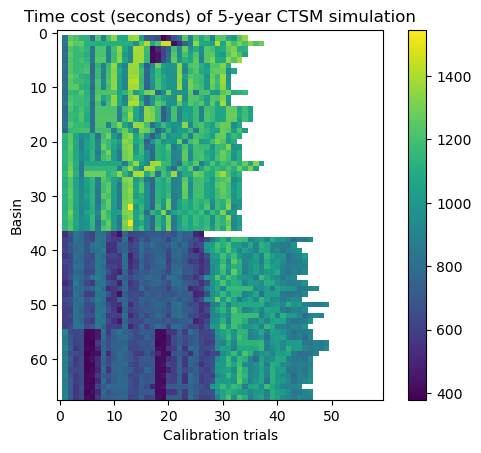

In [59]:
# time map
plt.imshow(timecost)
plt.colorbar()
plt.title('Time cost (seconds) of 5-year CTSM simulation')
plt.ylabel('Basin')
plt.xlabel('Calibration trials')
plt.show()

/glade/scratch/guoqiang/ipykernel_17783/1249231888.py:3: RuntimeWarning: Mean of empty slice
  timecost_a = np.nanmean(timecost_a, axis=1)


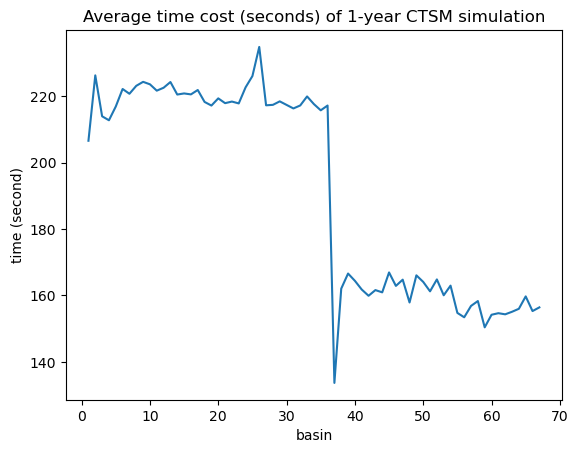

In [61]:
# average time cost / year
timecost_a = timecost / filenum
timecost_a = np.nanmean(timecost_a, axis=1)
plt.plot(timecost_a)
plt.xlabel('basin')
plt.ylabel('time (second)')
plt.title('Average time cost (seconds) of 1-year CTSM simulation')
plt.show()

In [67]:
# total time cost for 
# 671 basins
# 6-year simulation (1-year spin up and 5-year calibration)
# 60-year spin-up (initial spin up before calibration)
# 35-year after-calib simulation
# 500 trials (MO-ASMO)
# 200 trials (DDS)

tottime1 = np.nanmean(timecost_a) * 671 * (60 + 35 + 6*500) / 3600
print('MO-ASMO calib, 500 trials, time cost (h):', tottime1)

tottime2 = np.nanmean(timecost_a) * 671 * (60 + 35 + 6*200) / 3600
print('DDS calib, 200 trials, time cost (h):', tottime2)

print('Total hours (M):', (tottime1+tottime2)/1e6)

MO-ASMO calib, 500 trials, time cost (h): 110500.20688186966
DDS calib, 200 trials, time cost (h): 46235.14310566113
Total hours (M): 0.1567353499875308
